#### MNIST Introduction
- MNIST (Mixed National Institute of Standards and Technology database)
- **손글씨 숫자(0~9) 이미지 데이터**
- 각 이미지는 **가로와 세로가 각각 28px, 흑백 이미지**로 만들어져 있음
- Training data == 55,000장, Validation data == 5,000장, Test data = 10,000장

#### Prepare the data

In [1]:
from tensorflow.keras import datasets

(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
print(train_data.shape)
print(test_data.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
pd.DataFrame(train_data[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


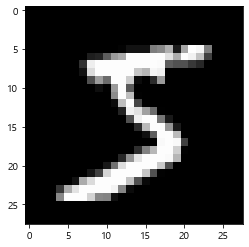

In [6]:
plt.imshow(train_data[0], cmap='gray') # 60000장의 train data 중 첫번째 data

In [7]:
# 각 이미지(28px * 28px)는 0~255 사이의 숫자로 이루어져 있습니다.

print(train_data.min())
print(train_data.max()) 

0
255


In [8]:
# (60000, 28, 28) -> (60000, 784)
# 각 이미지를 [28행 x 28열]에서 [1행 x 784열]로 펼쳐줍니다. 
# 각 이미지 내의 pixel 값을 [0~255]에서 [0~1]로 바꿔줍니다.

train_data = train_data.reshape(60000, 784) / 255.0
test_data = test_data.reshape(10000, 784) / 255.0

In [9]:
train_data.shape

(60000, 784)

One-hot encoding

In [10]:
# 각 이미지에 대한 label은 integer value로 이루어져 있습니다.

train_label

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
# 각 label을 integer value에서 one-hot vector로 변경해줍니다. (Tensorflow 2.x 활용)

from tensorflow.keras import utils

train_label = utils.to_categorical(train_label) # 0~9 -> one-hot vector
test_label = utils.to_categorical(test_label) # 0~9 -> one-hot vector

In [12]:
train_label.shape

(60000, 10)

In [13]:
# 기존의 integer label들이 아래와 같은 one-hot vector들로 변경된 것을 확인할 수 있습니다.

import pandas as pd

pd.DataFrame(train_label).head(3)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


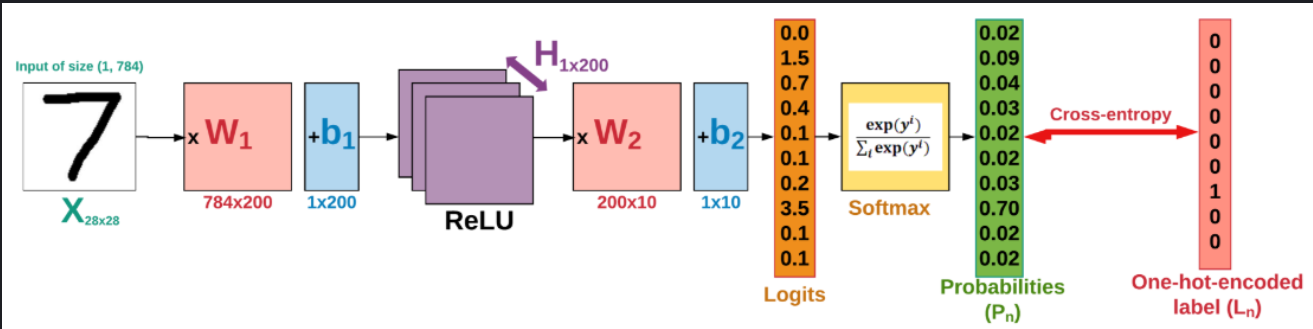

#### Build the model

In [14]:
# import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information
tf.logging.set_verbosity(tf.logging.ERROR)

Instructions for updating:
non-resource variables are not supported in the long term


In [15]:
# Placeholder만들기

## [# of batch data, # of features(columns) == 총 784개의 열]
X = tf.placeholder(tf.float32, [None, 28*28])
## 0~9 == 총 10개의 열
Y = tf.placeholder(tf.float32, [None, 10])

In [21]:
# 모든 Parameter Thata는 variable로 선언

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))

In [22]:
W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))

In [23]:
W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

#### Set the criterion

In [24]:
# for Regression
# cost = tf.losses.mean_squared_error(Y, model)

# for Classification, 'cross-entropy' after 'softmax'
cost = tf.losses.softmax_cross_entropy(Y, model)

# select optimizer & connect with cost function
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

#### Train the model

In [25]:
sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

In [28]:
sess.run(W1).shape

(784, 256)

In [30]:
train_data.shape

(60000, 784)

In [31]:
# Gradient descent를 적용하기 전까지 한번에 밀어넣는 데이터 수 지정
## 100 * 600 = 60000
batch_size = 100 

total_batch = int(len(train_data) / batch_size)

print(total_batch)

600


In [ ]:
# import tqdm
# for epoch in tqdm.notebook.tqdm(range(15)):

In [32]:
for epoch in range(15):
    
    
    total_cost = 0 # 매 epoch 마다의 평균 에러 값 계산을 위해 활용됩니다.
    batch_idx = 0 # 매 batch 마다 꺼낼 데이터의 시작 index 값 지정을 위해 활용됩니다.
    
    for i in range(total_batch): # iterate over # of batches
    
        # Training data(60000장)에서 batch_size(100개) 만큼 순서대로 꺼내어 학습에 활용해줍니다.
        batch_x = train_data[ batch_idx : batch_idx + batch_size ]
        batch_y = train_label[ batch_idx : batch_idx + batch_size ]
        
        sess.run(optimizer, feed_dict={X: batch_x, Y: batch_y}) # 먹여줄(feed) 딕셔너리(dict)
        
        # 이번 batch를 기준으로 계산이 끝난 Cross-entropy 값을 total_cost에 더해줍니다. (epoch 종료 후 평균을 냅니다.)
        batch_cost = sess.run(cost, feed_dict={X: batch_x, Y: batch_y})
        total_cost = total_cost + batch_cost
        
        # 다음 for loop에서 꺼낼 데이터의 시작 index 번호를 batch_size(100) 만큼 증가시킵니다.
        batch_idx += batch_size
    
    
    # (이번 epoch가 종료되었을 시점의) training data 기준 Cross-entropy 값을 계산합니다.
    training_cost = total_cost / total_batch
    
    # (이번 epoch가 종료되었을 시점의) test data 기준 Cross-entropy 값을 계산합니다.
    test_cost = sess.run(cost, feed_dict={X: test_data, Y: test_label}) 
    
    
    print('Epoch: {}'.format(epoch + 1), 
          '|| Avg. Training cost = {:.3f}'.format(training_cost), 
          '|| Current Test cost = {:.3f}'.format(test_cost))

print('Learning process is completed!')

Epoch: 1 || Avg. Training cost = 0.386 || Current Test cost = 0.185
Epoch: 2 || Avg. Training cost = 0.136 || Current Test cost = 0.116
Epoch: 3 || Avg. Training cost = 0.083 || Current Test cost = 0.104
Epoch: 4 || Avg. Training cost = 0.055 || Current Test cost = 0.123
Epoch: 5 || Avg. Training cost = 0.037 || Current Test cost = 0.132
Epoch: 6 || Avg. Training cost = 0.026 || Current Test cost = 0.122
Epoch: 7 || Avg. Training cost = 0.018 || Current Test cost = 0.097
Epoch: 8 || Avg. Training cost = 0.015 || Current Test cost = 0.099
Epoch: 9 || Avg. Training cost = 0.014 || Current Test cost = 0.102
Epoch: 10 || Avg. Training cost = 0.010 || Current Test cost = 0.097
Epoch: 11 || Avg. Training cost = 0.007 || Current Test cost = 0.097
Epoch: 12 || Avg. Training cost = 0.006 || Current Test cost = 0.103
Epoch: 13 || Avg. Training cost = 0.005 || Current Test cost = 0.101
Epoch: 14 || Avg. Training cost = 0.004 || Current Test cost = 0.110
Epoch: 15 || Avg. Training cost = 0.004 || 